# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# Making Blob Sets

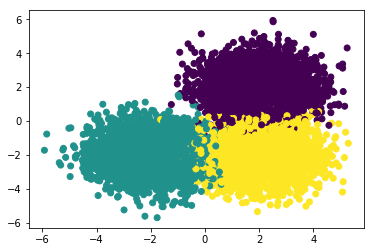

In [2]:
# set 1
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X1, y1 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

#Divide into training and test sets.
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=42)

This is blob set 1.  It will be somewhat of a control due to its simplicity.  The blobs are fairly close together but have somewhat defined boundaries, so it will be an easy test for most algorithms.

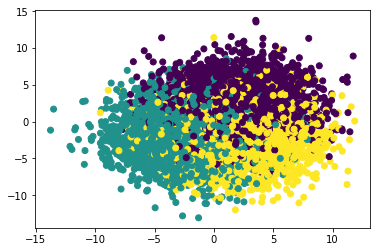

In [3]:
# set 2
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X2, y2 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=3,
    n_features=2,
    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

#Divide into training and test sets.
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.9,
    random_state=42)

This is blob 2. This blobs is very similar to blob 1 but each blob has triple the standard deviation of blob one. This will be used to test how the clustering algorithms handle high variance. 

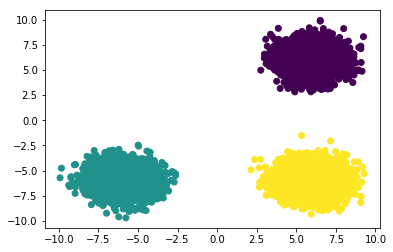

In [4]:
# set 3
# The coordinates of the centers of our blobs.
centers = [[6, 6], [-6, -6], [6, -6]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X3, y3 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.show()

#Divide into training and test sets.
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.9,
    random_state=42)

This is blob 3. It is different from the other blob configurations because the blobs are very far apart.  Blob 3 will be used to test how well clustering algorithms will handle blobs that are extremely far apart and well defined.

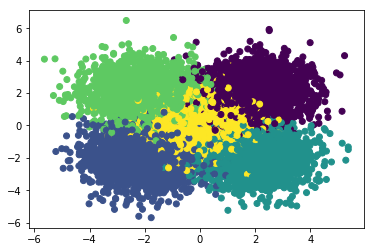

In [5]:
# set 4
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-2, 2],[0, 0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X4, y4 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X4[:, 0], X4[:, 1], c=y4)
plt.show()

#Divide into training and test sets.
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4,
    y4,
    test_size=0.9,
    random_state=42)

This is blob 4. This blob configuration differs from blob 1 by adding 2 more blobs.  These blobs overlap and are much less well defined than the original blob 1.  I will use blob 4 to see how clustering algorithms handle a slight increase in complexity.

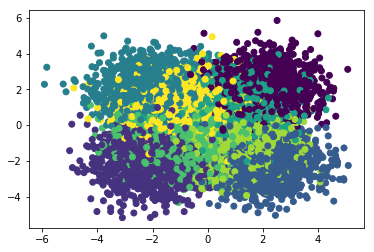

In [6]:
# set 5
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2],[-2, 2],[1, 1],[-1, -1],[1, -1],[-1, 1]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X5, y5 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X5[:, 0], X5[:, 1], c=y5)
plt.show()

#Divide into training and test sets.
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5,
    y5,
    test_size=0.9,
    random_state=42)

This is blob 5. It is much more complex and complicated than most of the other blob configurations, having 8 blobs which are all fairly close to one another. Blob 5 will be used to see how the clustering algorithms handle data which is very complicated overall. 

# K Means

## Blob 1 - K Means

In [7]:
from sklearn.cluster import KMeans, MiniBatchKMeans

y_pred1 = KMeans(n_clusters=3, random_state=42).fit_predict(X1_train)

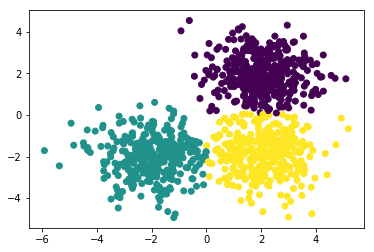

Comparing the K-Means blob 1 clusters to actual blob 1:
col_0    0    1    2
row_0               
0      352    0   10
1        1  310    9
2        6    5  307


In [8]:
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=y_pred1)
plt.show()

print('Comparing the K-Means blob 1 clusters to actual blob 1:')
print(pd.crosstab(y1_train,y_pred1))

## Blob 2 - K Means

In [9]:
y_pred2 = KMeans(n_clusters=3, random_state=42).fit_predict(X2_train)

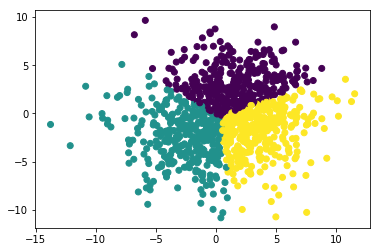

Comparing the K-Means blob 2 clusters to actual blob 2:
col_0    0    1    2
row_0               
0      219   35  108
1       34  228   58
2       60   75  183


In [10]:
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y_pred2)
plt.show()

print('Comparing the K-Means blob 2 clusters to actual blob 2:')
print(pd.crosstab(y2_train,y_pred2))

## Blob 3 - K Means

In [11]:
y_pred3 = KMeans(n_clusters=3, random_state=42).fit_predict(X3_train)

In [ ]:
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=y_pred3)
plt.show()

print('Comparing the K-Means blob 3 clusters to actual blob 3:')
print(pd.crosstab(y3_train,y_pred3))

## Blob 4 - K Means

In [ ]:
y_pred4 = KMeans(n_clusters=5, random_state=42).fit_predict(X4_train)

In [ ]:
plt.scatter(X4_train[:, 0], X4_train[:, 1], c=y_pred4)
plt.show()

print('Comparing the K-Means blob 4 clusters to actual blob 4:')
print(pd.crosstab(y4_train,y_pred4))

## Blob 5 - K Means

In [ ]:
y_pred5 = KMeans(n_clusters=8, random_state=42).fit_predict(X5_train)

In [ ]:
plt.scatter(X5_train[:, 0], X5_train[:, 1], c=y_pred5)
plt.show()

print('Comparing the K-Means blob 5 clusters to actual blob 5:')
print(pd.crosstab(y5_train,y_pred5))

## Conclusion: K-Means

The K-Means clustering algorithm worked very well with Blobs 1 and 3, had some trouble with Blob 2, and poorly with Blobs 4 and 5. 

This tells me that K-Means very effective when processing simple and well differentiated data, but has increasingly more difficultly when the situation gets more complicated

# Mean Shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X1_train, quantile=0.2, n_samples=500)

## Blob 1 - Mean Shift

In [ ]:
# Declare and fit the model for blob 1
ms1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms1.fit(X1_train)

# Extract cluster assignments for each data point.
labels_ms1 = ms1.labels_

# Count our clusters.
n_clusters_1 = len(np.unique(labels_ms1))

print("Number of estimated clusters: {}".format(n_clusters_1))

In [ ]:
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=labels_ms1)
plt.show()

print('Comparing the Mean Shift blob 1 clusters to actual blob 1:')
print(pd.crosstab(y1_train,labels_ms1))

## Blob 2 - Mean Shift

In [ ]:
# Declare and fit the model for blob 2
ms2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms2.fit(X2_train)

# Extract cluster assignments for each data point.
labels_ms2 = ms2.labels_

# Count our clusters.
n_clusters_2 = len(np.unique(labels_ms2))

print("Number of estimated clusters: {}".format(n_clusters_2))

In [ ]:
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=labels_ms2)
plt.show()

print('Comparing the Mean Shift blob 2 clusters to actual blob 2:')
print(pd.crosstab(y2_train,labels_ms2))

## Blob 3 - Mean Shift

In [ ]:
# Declare and fit the model for blob 3
ms3 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms3.fit(X3_train)

# Extract cluster assignments for each data point.
labels_ms3 = ms3.labels_

# Count our clusters.
n_clusters_3 = len(np.unique(labels_ms3))

print("Number of estimated clusters: {}".format(n_clusters_3))

In [ ]:
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=labels_ms3)
plt.show()

print('Comparing the Mean Shift blob 3 clusters to actual blob 3:')
print(pd.crosstab(y3_train,labels_ms3))

## Blob 4 - Mean Shift

In [ ]:
# Declare and fit the model for blob 4
ms4 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms4.fit(X4_train)

# Extract cluster assignments for each data point.
labels_ms4 = ms4.labels_

# Count our clusters.
n_clusters_4 = len(np.unique(labels_ms4))

print("Number of estimated clusters: {}".format(n_clusters_4))

In [ ]:
plt.scatter(X4_train[:, 0], X4_train[:, 1], c=labels_ms4)
plt.show()

print('Comparing the Mean Shift blob 4 clusters to actual blob 4:')
print(pd.crosstab(y4_train,labels_ms4))

## Blob 5 - Mean Shift

In [ ]:
# Declare and fit the model for blob 2
ms5 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms5.fit(X5_train)

# Extract cluster assignments for each data point.
labels_ms5 = ms5.labels_

# Count our clusters.
n_clusters_5 = len(np.unique(labels_ms5))

print("Number of estimated clusters: {}".format(n_clusters_5))

In [ ]:
plt.scatter(X5_train[:, 0], X5_train[:, 1], c=labels_ms5)
plt.show()

print('Comparing the Mean Shift blob 5 clusters to actual blob 5:')
print(pd.crosstab(y5_train,labels_ms5))

## Conclusion: Mean Shift

Mean Shift performed very well with Blobs 1 and 3, poorly on Blob 4, and extremely bad on Blobs 2 and 5.

This tells me that Mean Shift can work well with data that has well-defined categories, but begins to struggle immensely as the categories become obscured. It performed much worse overall than K-Means, likely due to the fact that the user gives k-means the number of clusters while mean shift self-determines the number of clusters.

# Spectral Clustering 

In [ ]:
from sklearn.cluster import SpectralClustering

## Blob 1 - Spectral

In [ ]:
n_clusters=3

# Declare and fit the model.
sc1 = SpectralClustering(n_clusters=n_clusters)
sc1.fit(X1_train)

#Predicted clusters.
predict1=sc1.fit_predict(X1_train)

In [ ]:
plt.scatter(X1_train[:, 0], X1_train[:, 1], c=predict1)
plt.show()

print('Comparing Spectral Affinity Blob 1 prediction to real Blob 1 data:')
print(pd.crosstab(y1_train,predict1))

## Blob 2 - Spectral

In [ ]:
n_clusters=3

# Declare and fit the model.
sc2 = SpectralClustering(n_clusters=n_clusters)
sc2.fit(X2_train)

#Predicted clusters.
predict2=sc2.fit_predict(X2_train)

In [ ]:
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=predict2)
plt.show()

print('Comparing Spectral Affinity Blob 2 prediction to real Blob 2 data:')
print(pd.crosstab(y2_train,predict2))

## Blob 3 - Spectral

In [ ]:
n_clusters=3

# Declare and fit the model.
sc3 = SpectralClustering(n_clusters=n_clusters)
sc3.fit(X3_train)

#Predicted clusters.
predict3=sc3.fit_predict(X3_train)

In [ ]:
plt.scatter(X3_train[:, 0], X3_train[:, 1], c=predict3)
plt.show()

print('Comparing Spectral Affinity Blob 3 prediction to real Blob 3 data:')
print(pd.crosstab(y3_train,predict3))

## Blob 4 - Spectral

In [ ]:
n_clusters=5

# Declare and fit the model.
sc4 = SpectralClustering(n_clusters=n_clusters)
sc4.fit(X4_train)

#Predicted clusters.
predict4=sc4.fit_predict(X4_train)

In [ ]:
plt.scatter(X4_train[:, 0], X4_train[:, 1], c=predict4)
plt.show()

print('Comparing Spectral Affinity Blob 4 prediction to real Blob 4 data:')
print(pd.crosstab(y4_train,predict4))

## Blob 5 - Spectral

In [ ]:
n_clusters=8

# Declare and fit the model.
sc5 = SpectralClustering(n_clusters=n_clusters)
sc5.fit(X5_train)

#Predicted clusters.
predict5=sc5.fit_predict(X5_train)

In [ ]:
plt.scatter(X5_train[:, 0], X5_train[:, 1], c=predict5)
plt.show()

print('Comparing Spectral Affinity Blob 5 prediction to real Blob 5 data:')
print(pd.crosstab(y5_train,predict5))

## Conclusion: Spectral Affinity

Spectral performed well on Blob 1 and very poorly on Blob 2. It performed relatively poorly on Blob 3, getting many inaccuraies even though the groups were very clearly defined. However, it performed relatively very well on Blobs 4 and 5, getting legitimately good scores for Blob 4, and getting a good guess at the groups of Blob 5 (though it was still inaccurate.)

Spectral seems to perform ok under simple conditions. But, where it shines compared to other models is in situations with more groups, like those of Blobs 4 and 5. However, it has troulbe with high variance groups, like Blob 2.

## Affinity Propagation 

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

## Blob 1 - Affinity Propagation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af1 = AffinityPropagation().fit(X1_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices1 = af1.cluster_centers_indices_
n_clusters_1 = len(cluster_centers_indices1)
labels_ap1 = af1.labels_

print('Estimated number of clusters: {}'.format(n_clusters_1))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_1), colors):
    class_members = labels_ap1 == k
    cluster_center = X1_train[cluster_centers_indices1[k]]
    plt.plot(X1_train[class_members, 0], X1_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X1_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_1))
plt.show()

## Blob 2 - Affinity Propagation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af2 = AffinityPropagation().fit(X2_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices2 = af2.cluster_centers_indices_
n_clusters_2 = len(cluster_centers_indices2)
labels_ap2 = af2.labels_

print('Estimated number of clusters: {}'.format(n_clusters_2))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_2), colors):
    class_members = labels_ap2 == k
    cluster_center = X2_train[cluster_centers_indices2[k]]
    plt.plot(X2_train[class_members, 0], X2_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X2_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_2))
plt.show()

## Blob 3 - Affinity Propagation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af3 = AffinityPropagation().fit(X3_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices3 = af3.cluster_centers_indices_
n_clusters_3 = len(cluster_centers_indices3)
labels_ap3 = af3.labels_

print('Estimated number of clusters: {}'.format(n_clusters_3))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_3), colors):
    class_members = labels_ap3 == k
    cluster_center = X3_train[cluster_centers_indices3[k]]
    plt.plot(X3_train[class_members, 0], X3_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X3_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_3))
plt.show()

## Blob 4 - Affinity Propagation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af4 = AffinityPropagation().fit(X4_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices4 = af4.cluster_centers_indices_
n_clusters_4 = len(cluster_centers_indices4)
labels_ap4 = af4.labels_

print('Estimated number of clusters: {}'.format(n_clusters_4))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_4), colors):
    class_members = labels_ap4 == k
    cluster_center = X4_train[cluster_centers_indices4[k]]
    plt.plot(X4_train[class_members, 0], X4_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X4_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_4))
plt.show()

## Blob 5 - Affinity Propagation

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af5 = AffinityPropagation().fit(X5_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices5 = af5.cluster_centers_indices_
n_clusters_5 = len(cluster_centers_indices5)
labels_ap5 = af5.labels_

print('Estimated number of clusters: {}'.format(n_clusters_5))

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_5), colors):
    class_members = labels_ap5 == k
    cluster_center = X1_train[cluster_centers_indices5[k]]
    plt.plot(X5_train[class_members, 0], X5_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X5_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_5))
plt.show()

## Conclusion: Affinity Propagation

Affinity propagation performed much differently than the other models. It always came up with way too many clusters, so much so that it much impossible to directly compare its accuracy. It is unknown if these groups are infact subgroups that form into the true clusters or completely inacurrate. 

This type of algorithm seems more suited for making subgroups than predicting this type of data.